# Lab | Random Forests

### Instructions
- Apply the Random Forests algorithm but this time only by upscaling the data to deal with the imbalance.
- Use Feature Selections that you have learned in class to decide if you want to use all of the features (Variance Threshold, RFE, PCA, etc.)
- Re-run the Random Forest algorithm to determine if the Feature Selection has improved the results.
- Discuss the output and its impact in the business scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the business?

In [1]:
import pandas as pd
import numpy as np

numerical   = pd.read_csv('./files_for_lab/numerical.csv')
categorical = pd.read_csv('./files_for_lab/categorical.csv')
target      = pd.read_csv('./files_for_lab/target.csv')
target

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [2]:
target['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [3]:
display(numerical.shape)
categorical.shape

(95412, 315)

(95412, 22)

In [4]:
numerical.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26


In [5]:
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3


In [6]:
categorical.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

For simplicity, I will OneHot Encode only CLUSTER and DATASRCE.
All other categorical fields with integer type will be ordinally encoded by scaling with numericals.

In [7]:
categorical['CLUSTER'] = categorical['CLUSTER'].astype(object)
categorical['DATASRCE'] = categorical['DATASRCE'].astype(object)

In [8]:
numerical.isna().sum().sum()

0

In [9]:
categorical.isna().sum().sum()

0

So data is clean, but we have not chosen features or scaled/encoded the data.

In [10]:
y = target['TARGET_B']
X = pd.concat([numerical, categorical], axis=1)

### Upscaling, encoding and scaling data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 123)

In [12]:
train = pd.concat([X_train, y_train], axis=1)

train_0 = train[train['TARGET_B']==0]
train_1 = train[train['TARGET_B']==1]

display(train_0.shape)
train_1.shape              # heavily imbalanced dataset

(72452, 338)

(3877, 338)

In [13]:
from sklearn.utils import resample

train_1_oversampled = resample(train_1, replace=True, n_samples = len(train_0))
display(train_0.shape)
train_1_oversampled.shape

(72452, 338)

(72452, 338)

In [14]:
train_upsampled = pd.concat([train_0, train_1_oversampled], axis=0)

# and to randomise the rows (although I will do this indirectly through encoding/scaling later):

train_upsampled = train_upsampled.sample(frac=1)

display(train_upsampled.shape)
train_upsampled.head()

# note the TARGET_B column on right is not ordered

(144904, 338)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B
22804,0,67.000000,5,9,0,0,24,38,36,1,...,12,89,9,95,4,96,1,87,3,0
50871,0,60.000000,6,6,3,0,24,31,69,14,...,5,89,8,95,11,95,12,87,1,1
59533,1,60.000000,3,9,0,1,28,35,15,6,...,1,94,1,95,12,95,12,94,1,0
31035,0,79.000000,5,9,0,0,48,27,40,22,...,1,92,6,96,3,96,3,91,10,0
7248,2,61.611649,1,9,0,0,30,39,37,8,...,2,90,2,95,12,95,12,86,12,1


In [15]:
# I will now reassign X_train and y_train to be based off this upsampled dataset, and then 

X_train = train_upsampled.drop('TARGET_B', axis=1)
y_train = train_upsampled['TARGET_B']

display(X_train.head())
y_train.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
22804,0,67.000000,5,9,0,0,24,38,36,1,...,30,12,89,9,95,4,96,1,87,3
50871,0,60.000000,6,6,3,0,24,31,69,14,...,38,5,89,8,95,11,95,12,87,1
59533,1,60.000000,3,9,0,1,28,35,15,6,...,38,1,94,1,95,12,95,12,94,1
31035,0,79.000000,5,9,0,0,48,27,40,22,...,19,1,92,6,96,3,96,3,91,10
7248,2,61.611649,1,9,0,0,30,39,37,8,...,0,2,90,2,95,12,95,12,86,12


22804    0
50871    1
59533    0
31035    0
7248     1
Name: TARGET_B, dtype: int64

In [16]:
X_train_num = X_train.select_dtypes(np.number).copy()
X_test_num = X_test.select_dtypes(np.number).copy()
X_train_cat = X_train.select_dtypes(object).copy()
X_test_cat = X_test.select_dtypes(object).copy()

display(X_train_cat.shape) # expect only 9 (not 22) columns now as we will ordinally encode the integer categorical columns with numericals
display(X_train_cat.head())
y_train.head()

(144904, 9)

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
22804,MI,51,H,M,3,L,E,D,R
50871,other,40,H,M,1,L,F,C,T
59533,other,39,U,M,2,L,F,B,T
31035,CA,3,H,F,3,L,F,A,U
7248,other,49,H,M,2,L,G,D,R


22804    0
50871    1
59533    0
31035    0
7248     1
Name: TARGET_B, dtype: int64

The numericals do not need to be scaled for Decision Tree / Random Forest models, but for feature selection later on it will be easier if the dataset has been scaled.

In [17]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num) # fit only on the training set, but applied to both train and test (below)

X_train_scaled = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num), columns=X_train_num.columns)

display(X_train_scaled.describe().T)
X_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
TCODE,144904.0,0.000866,0.014603,0.0,0.000000,0.000014,0.000028,1.0
AGE,144904.0,0.627430,0.145697,0.0,0.536082,0.624862,0.731959,1.0
INCOME,144904.0,0.530999,0.281532,0.0,0.333333,0.666667,0.666667,1.0
WEALTH1,144904.0,0.786798,0.297611,0.0,0.666667,1.000000,1.000000,1.0
HIT,144904.0,0.014054,0.035641,0.0,0.000000,0.000000,0.012448,1.0
...,...,...,...,...,...,...,...,...
MAXRDATE_MM,144904.0,0.538334,0.362909,0.0,0.181818,0.545455,0.909091,1.0
LASTDATE_YR,144904.0,0.229369,0.271674,0.0,0.000000,0.000000,0.500000,1.0
LASTDATE_MM,144904.0,0.501063,0.389547,0.0,0.090909,0.454545,0.909091,1.0
FIRSTDATE_YR,144904.0,0.948651,0.033555,0.0,0.916667,0.947917,0.979167,1.0


,count,mean,std,min,25%,50%,75%,max
TCODE,19083.0,0.000725,0.012556,0.000000,0.000000,0.000014,0.000028,0.541679
AGE,19083.0,0.624277,0.150293,0.000000,0.525773,0.624862,0.731959,1.000000
INCOME,19083.0,0.523441,0.283671,0.000000,0.333333,0.666667,0.666667,1.000000
WEALTH1,19083.0,0.783891,0.301476,0.000000,0.555556,1.000000,1.000000,1.000000
HIT,19083.0,0.014330,0.043738,0.000000,0.000000,0.000000,0.012448,1.000000
...,...,...,...,...,...,...,...,...
MAXRDATE_MM,19083.0,0.538595,0.362678,0.000000,0.181818,0.545455,0.909091,1.000000
LASTDATE_YR,19083.0,0.209742,0.263734,0.000000,0.000000,0.000000,0.500000,1.000000
LASTDATE_MM,19083.0,0.513003,0.386048,0.000000,0.090909,0.545455,0.909091,1.000000
FIRSTDATE_YR,19083.0,0.951069,0.033097,0.802083,0.916667,0.958333,0.979167,1.000000


In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat) # again, fit only on the training set, but applied to both
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

display(X_train_encode.head())
X_test_encode.head()

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
display(y_train.head())
y_test.head()

22804    0
50871    1
59533    0
31035    0
7248     1
Name: TARGET_B, dtype: int64

10396    0
77799    0
66629    0
62633    0
83026    0
Name: TARGET_B, dtype: int64

In [20]:
X_train_transformed = pd.concat([X_train_scaled,X_train_encode], axis = 1)
X_test_transformed = pd.concat([X_test_scaled,X_test_encode], axis = 1)

y_train = y_train.reset_index(drop=True) # as row index / labels are no longer aligned with transformed X
y_test = y_test.reset_index(drop=True)

In [21]:
display(y_train.head())
y_test.head()

0    0
1    1
2    0
3    0
4    1
Name: TARGET_B, dtype: int64

0    0
1    0
2    0
3    0
4    0
Name: TARGET_B, dtype: int64

In [22]:
y_train.value_counts() # equal as we upsampled the train_1 data

0    72452
1    72452
Name: TARGET_B, dtype: int64

So entire dataframe is prepared for modelling.
#### No features have been removed at this stage.

### First Random Forest Classifier Model RFC

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# for simplicity, I will keep the parameters used in class

RFC = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state=42)

RFC.fit(X_train_transformed, y_train)

RFC_score = RFC.score(X_test_transformed, y_test) # I want this for comparison later

print('Training score: ', RFC.score(X_train_transformed, y_train))
print('Test score: ', RFC_score)

# to visualise the model output

y_pred = RFC.predict(X_test_transformed)
display(confusion_matrix(y_test, y_pred))

Training score:  0.6246549439628996
Test score:  0.614892836556097


array([[11218,  6899],
       [  450,   516]], dtype=int64)

### Feature Selection

I'll use VarianceThreshold to eliminate columns adding little benefit to the model.

In [33]:
from sklearn.feature_selection import VarianceThreshold

var_threshold = 0.02 # arbitrary, low value for all columns as already scaled

sel = VarianceThreshold(threshold=(var_threshold)) # selector

sel = sel.fit(X_train_transformed) # the fit calculates the variance for each column

temp = sel.transform(X_train_transformed) # the transform removes the low variance columns
temp = pd.DataFrame(temp)

print(X_train_transformed.shape)
print(temp.shape)

(144904, 406)
(144904, 131)


In [34]:
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,0.680412,0.666667,1.000000,0.383838,0.363636,0.333333,0.000000,0.000000,1.000000,1.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.608247,0.833333,0.666667,0.313131,0.696970,0.666667,0.121212,0.000000,0.888889,0.909091,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.608247,0.333333,1.000000,0.353535,0.151515,1.000000,0.111111,0.787879,0.111111,0.222222,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.804124,0.666667,1.000000,0.272727,0.404040,0.777778,1.000000,0.000000,0.000000,0.050505,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.624862,0.000000,1.000000,0.393939,0.373737,0.555556,0.000000,1.000000,0.010101,0.989899,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [35]:
list(zip(X_train_transformed.columns, list(sel.get_support())))

[('TCODE', False),
 ('AGE', True),
 ('INCOME', True),
 ('WEALTH1', True),
 ('HIT', False),
 ('MALEMILI', False),
 ('MALEVET', False),
 ('VIETVETS', True),
 ('WWIIVETS', True),
 ('LOCALGOV', False),
 ('STATEGOV', False),
 ('FEDGOV', False),
 ('WEALTH2', True),
 ('POP901', False),
 ('POP902', False),
 ('POP903', False),
 ('POP90C1', True),
 ('POP90C2', True),
 ('POP90C3', True),
 ('POP90C4', False),
 ('POP90C5', False),
 ('ETH1', True),
 ('ETH2', True),
 ('ETH3', False),
 ('ETH4', False),
 ('ETH5', False),
 ('ETH6', False),
 ('ETH7', False),
 ('ETH8', False),
 ('ETH9', False),
 ('ETH10', False),
 ('ETH11', False),
 ('ETH12', False),
 ('ETH13', False),
 ('ETH14', False),
 ('ETH15', False),
 ('ETH16', False),
 ('AGE901', False),
 ('AGE902', False),
 ('AGE903', False),
 ('AGE904', False),
 ('AGE905', False),
 ('AGE906', False),
 ('AGE907', False),
 ('CHIL1', False),
 ('CHIL2', False),
 ('CHIL3', False),
 ('AGEC1', False),
 ('AGEC2', False),
 ('AGEC3', False),
 ('AGEC4', False),
 ('AGEC5', F

In [37]:
col_drop = [col[0] for col in zip(X_train_transformed.columns, list(sel.get_support())) if col[1] == False]
col_drop

['TCODE',
 'HIT',
 'MALEMILI',
 'MALEVET',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'POP901',
 'POP902',
 'POP903',
 'POP90C4',
 'POP90C5',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR3',
 'MARR4',
 'HHP1',
 'HHP2',
 'DW3',
 'DW7',
 'DW8',
 'DW9',
 'HU3',
 'HU4',
 'HHD1',
 'HHD4',
 'HHD5',
 'HHD6',
 'HHD7',
 'HHD8',
 'HHD9',
 'HHD10',
 'HHD11',
 'HHD12',
 'ETHC1',
 'ETHC3',
 'ETHC4',
 'ETHC5',
 'ETHC6',
 'HUR1',
 'RHP1',
 'RHP2',
 'RHP3',
 'RHP4',
 'HUPA1',
 'HUPA4',
 'HUPA5',
 'HUPA7',
 'DMA',
 'IC1',
 'IC2',
 'IC3',
 'IC4',
 'IC5',
 'IC7',
 'IC8',
 'IC9',
 'IC10',
 'IC1

I will drop these columns from my X_train_transformed and X_test_transformed datasets and rerun the RandomForest model.

In [38]:
X_train_dropped = X_train_transformed.drop(col_drop, axis=1)
X_test_dropped = X_test_transformed.drop(col_drop, axis=1)

### Second Random Forest Classifier Model RFC2

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

RFC2 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state=42)

RFC2.fit(X_train_dropped, y_train)

RFC2_score = RFC2.score(X_test_dropped, y_test) # I want this for comparison later

print('Training score: ', RFC2.score(X_train_dropped, y_train))
print('Test score: ', RFC2_score)

# to visualise the model output

y_pred2 = RFC2.predict(X_test_dropped)
display(confusion_matrix(y_test, y_pred2))

Training score:  0.6248550764644178
Test score:  0.6184038149137976


array([[11269,  6848],
       [  434,   532]], dtype=int64)

In [40]:
print('Original RFC score: ', RFC_score)
print('New RFC score: ', RFC2_score)

Original RFC score:  0.614892836556097
New RFC score:  0.6184038149137976


### Feature Selection II

Now I'll try choosing only the "best" features rather than just removing the worst.

I'll use SelectKBest to take only the top 20 features.

Again, I'll do this using the training dataset.

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kbest = SelectKBest(chi2, k=20).fit_transform(X_train_transformed, y_train)

selected = pd.DataFrame(kbest)
selected.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.000000,0.000000,0.010101,0.121212,0.000000,0.060606,0.063559,0.170732,0.333333,0.214286,0.5,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.000000,0.050505,0.252525,0.515152,0.797980,0.010101,0.262626,0.046610,0.170732,0.333333,0.214286,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.020202,0.023256,0.313131,0.515152,0.767677,0.888889,0.121212,0.555556,0.055085,0.146341,1.000000,0.785714,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0
3,0.939394,0.279070,0.888889,0.939394,0.989899,1.000000,0.626263,0.717172,0.016949,0.048780,0.000000,0.571429,0.5,0.181818,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.020202,0.060606,0.000000,0.010101,0.059322,0.219512,0.000000,0.214286,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
# To check the individual scores of the top 30 features - more than we will choose
model = SelectKBest(chi2, k=20).fit(X_train_transformed, y_train)

df = pd.DataFrame(data = model.scores_, columns = ['score'])

df['Column'] = X_train_transformed.columns

print(df.sort_values(by = ['score'], ascending = False).head(30))

           score       Column
313  1433.224422       RFA_2F
398   918.317853     RFA_2A_G
396   589.497640     RFA_2A_E
324   405.575565  LASTDATE_YR
397   398.923501     RFA_2A_F
305   213.268865     CARDGIFT
111   186.311798         HVP2
112   177.312599         HVP3
110   176.052721         HVP1
113   123.312475         HVP4
115   111.121358         HVP6
22    103.175870         ETH2
361    92.213115   CLUSTER_24
378    89.678435   CLUSTER_41
316    86.763422    ODATEW_YR
329    82.102705     STATE_GA
129    78.283216          RP1
325    75.221912  LASTDATE_MM
107    74.571372        ETHC4
304    69.444662     NGIFTALL
367    64.409078   CLUSTER_30
108    61.469577        ETHC5
83     58.960999          HV1
84     58.414179          HV2
130    56.892670          RP2
300    55.317918      NUMPROM
299    55.316541     CARDPROM
315    53.462193     DOMAIN_B
365    53.033473   CLUSTER_28
391    52.750523   HOMEOWNR_U


Let's check for colinearity between these. I'll consider the top 30 features in case we need to remove any:

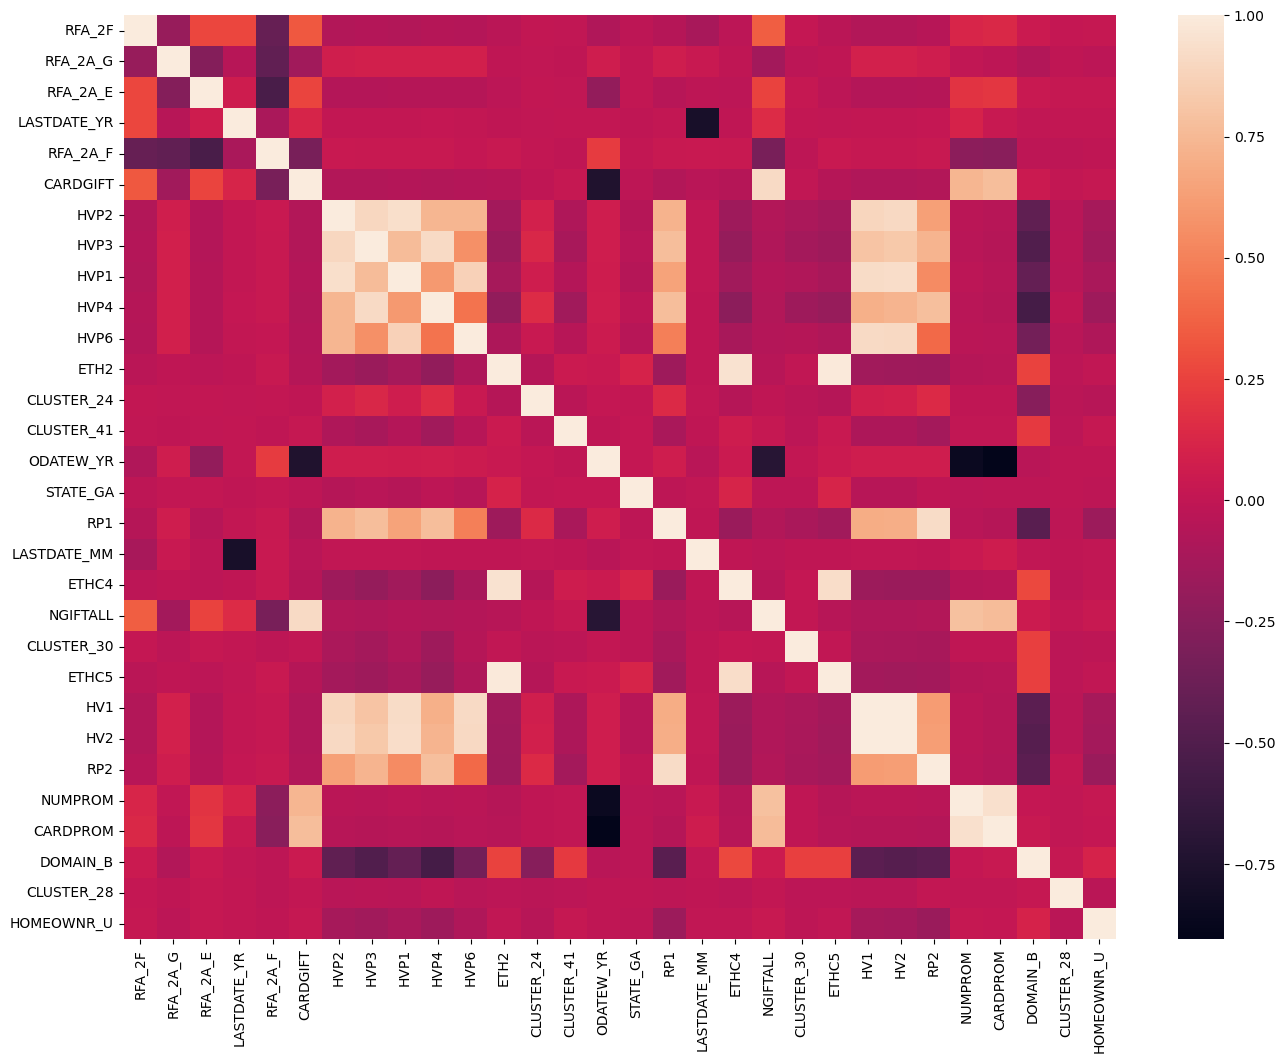

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = df.sort_values(by = ['score'], ascending = False).head(30)['Column']

corr_matrix=X_train_transformed[cols].corr(method='pearson')
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.heatmap(corr_matrix)
plt.show()

Can see colinearity between features.

I will not include the following:
- HVP3
- HVP1
- ETHC4
- HV1
- HV2
- RP2

So I'll use RFA_2F through to NUMPROM excluding those six.

In [49]:
cols = list(df.sort_values(by = ['score'], ascending = False).head(26)['Column'])

cols.remove('HVP3')
cols.remove('HVP1')
cols.remove('ETHC4')
cols.remove('HV1')
cols.remove('HV2')
cols.remove('RP2')

display(len(cols))
cols

20

['RFA_2F',
 'RFA_2A_G',
 'RFA_2A_E',
 'LASTDATE_YR',
 'RFA_2A_F',
 'CARDGIFT',
 'HVP2',
 'HVP4',
 'HVP6',
 'ETH2',
 'CLUSTER_24',
 'CLUSTER_41',
 'ODATEW_YR',
 'STATE_GA',
 'RP1',
 'LASTDATE_MM',
 'NGIFTALL',
 'CLUSTER_30',
 'ETHC5',
 'NUMPROM']

In [52]:
X_train_top = X_train_transformed[cols]
X_test_top = X_test_transformed[cols]
X_train_top

,RFA_2F,RFA_2A_G,RFA_2A_E,LASTDATE_YR,RFA_2A_F,CARDGIFT,HVP2,HVP4,HVP6,ETH2,CLUSTER_24,CLUSTER_41,ODATEW_YR,STATE_GA,RP1,LASTDATE_MM,NGIFTALL,CLUSTER_30,ETHC5,NUMPROM
0,0.333333,0.0,1.0,0.5,0.0,0.170732,0.000000,0.121212,0.000000,0.000000,0.0,0.0,0.214286,0.0,0.060606,0.000000,0.063559,0.0,0.000000,0.278947
1,0.333333,0.0,0.0,0.0,1.0,0.170732,0.252525,0.797980,0.010101,0.000000,0.0,0.0,0.214286,0.0,0.262626,1.000000,0.046610,0.0,0.000000,0.315789
2,1.000000,0.0,0.0,0.0,1.0,0.146341,0.515152,0.888889,0.121212,0.020202,0.0,0.0,0.785714,0.0,0.555556,1.000000,0.055085,0.0,0.010101,0.173684
3,0.000000,0.0,0.0,0.5,1.0,0.048780,0.939394,1.000000,0.626263,0.939394,0.0,0.0,0.571429,0.0,0.717172,0.181818,0.016949,0.0,0.636364,0.121053
4,0.000000,1.0,0.0,0.0,0.0,0.219512,0.000000,0.060606,0.000000,0.000000,0.0,0.0,0.214286,0.0,0.010101,1.000000,0.059322,0.0,0.000000,0.347368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144899,0.666667,0.0,1.0,0.5,0.0,0.121951,0.222222,0.727273,0.060606,0.000000,0.0,0.0,0.285714,0.0,0.313131,0.090909,0.046610,0.0,0.000000,0.326316
144900,0.000000,0.0,0.0,0.0,1.0,0.024390,1.000000,1.000000,1.000000,0.010101,0.0,0.0,0.785714,0.0,0.979798,1.000000,0.008475,0.0,0.010101,0.126316
144901,1.000000,0.0,1.0,0.0,0.0,0.243902,0.040404,0.212121,0.000000,0.090909,0.0,0.0,0.642857,0.0,0.020202,0.727273,0.067797,0.0,0.050505,0.294737
144902,0.666667,0.0,1.0,0.0,0.0,0.097561,0.000000,0.000000,0.000000,0.979798,0.0,0.0,0.857143,0.0,0.030303,0.727273,0.012712,0.0,0.575758,0.105263


### Third Random Forest Classifier Model RFC3